In [ ]:
# STEP 1: Data Acquisition & Preparation

import pandas as pd
import numpy as np
import yfinance as yf

# Download stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Show first few rows
print(data.head())

# Check and remove missing values
print(data.isnull().sum())
data = data.dropna()

# Create new features
data['MA10'] = data['Close'].rolling(window=10).mean()    # 10-day Moving Average
data['Return'] = data['Close'].pct_change()               # Daily Returns
data['Volatility'] = data['Return'].rolling(window=10).std() # 10-day Volatility

# Remove NaN values *after* creating new features
data.dropna(inplace=True) #This line is added to drop the NaN introduced after feature creation

# Show updated data
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-12-23  254.989655  255.369227  253.171646  254.490204  40858800   
2024-12-24  257.916443  257.926411  255.009620  255.2094

Mean Squared Error (MSE): 0.83
R-squared (R²): 1.00


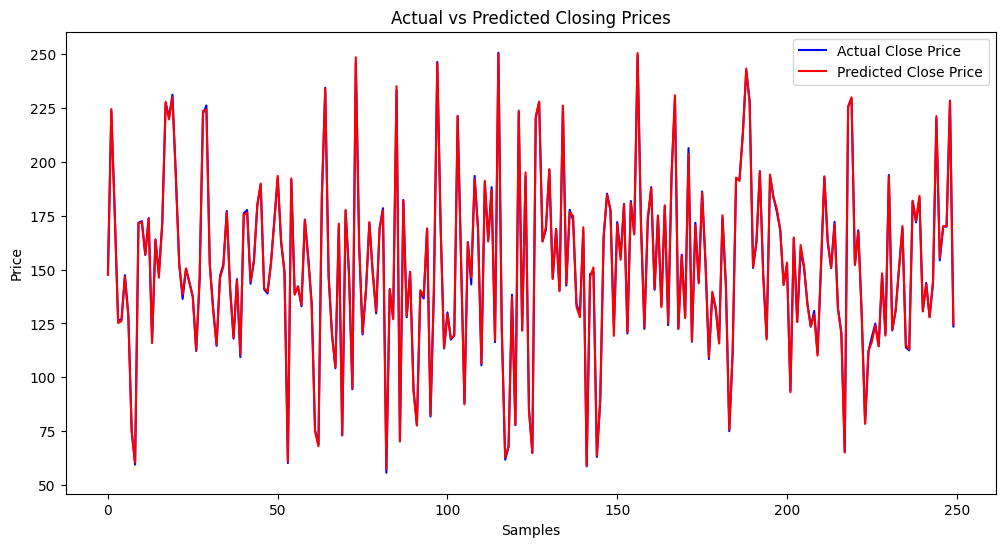

In [ ]:
# STEP 2: Stock Price Prediction

# 1. Define Features and Target
X = data[['Open', 'High', 'Low', 'Volume', 'MA10', 'Volatility']]
y = data['Close']

# 2. Split into Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
predictions = model.predict(X_test)

# 5. Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 6. Visualize the Results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(predictions, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


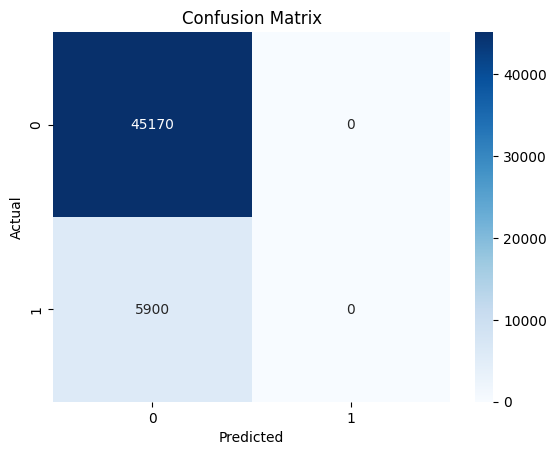

In [ ]:
# STEP 2, Part B: Credit Risk Modeling

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Original URL: '/Loan_default.csv.zip'
# Updated URL:
url = '/Loan_default.csv.zip'
credit_data = pd.read_csv(url)
print(credit_data.head())

# Preprocessing
print(credit_data.isnull().sum())

# Print the available columns to identify the correct names
print(credit_data.columns)

# Define Features and Target
# Use the actual column names from the DataFrame, and choose a suitable numerical target variable
X = credit_data[['Age', 'Income', 'LoanAmount', 'CreditScore']]  # Removed 'LoanID' from features
y = credit_data['Default']  # Assuming 'Default' is a column indicating loan default (1 or 0)


# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


   Marketing_Spend  Operations_Cost  Revenue
0              200              150      400
1              300              200      500
2              400              250      600
3              500              300      700
4              600              350      850
5              700              400      950
6              800              450     1050
7              900              500     1200
8             1000              550     1350
Mean Squared Error (MSE): 63.78
R-squared (R²): 1.00


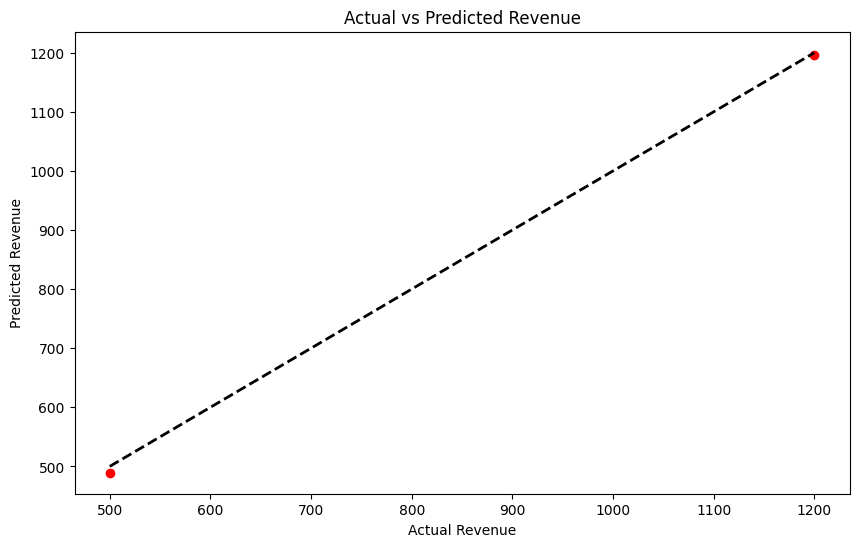

In [ ]:
# STEP 2, Part C: Revenue / Expense Forecasting

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample Dataset
data = {
    'Marketing_Spend': [200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'Operations_Cost': [150, 200, 250, 300, 350, 400, 450, 500, 550],
    'Revenue': [400, 500, 600, 700, 850, 950, 1050, 1200, 1350]
}
df = pd.DataFrame(data)
print(df)

# Define Features and Target
X = df[['Marketing_Spend', 'Operations_Cost']]
y = df['Revenue']

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualize
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()


Mean Squared Error (MSE): 63.78
Mean Absolute Error (MAE): 7.14
R-squared (R²): 1.00


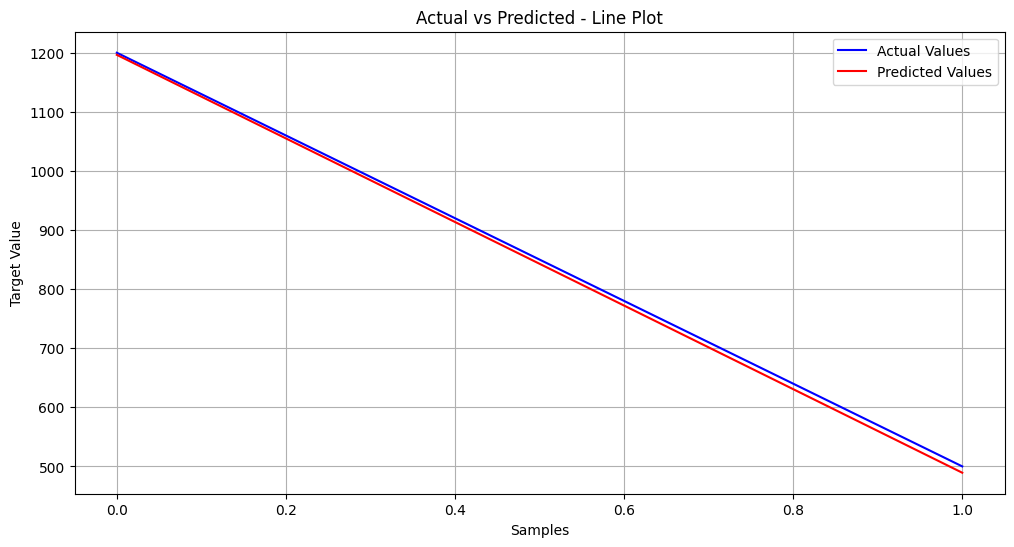

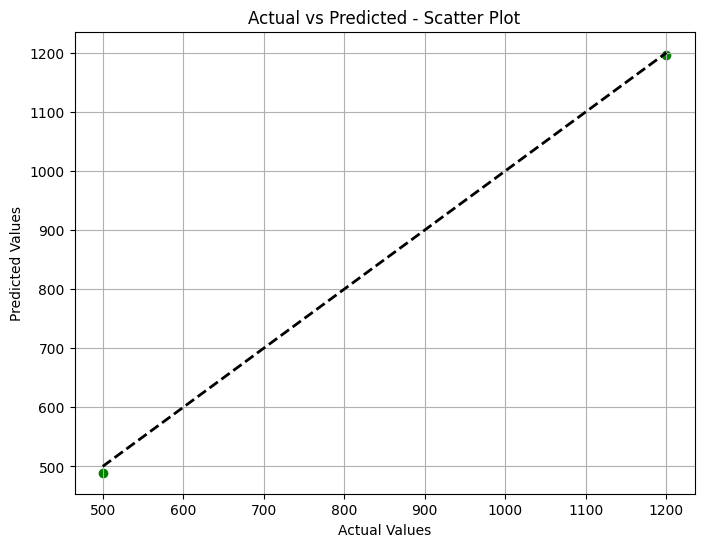

In [ ]:
# Setp 3: Regression Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have run the Revenue/Expense Forecasting code before this cell
# Instead of using the 'predictions' from the Revenue/Expense Forecasting directly,
# re-calculate it here using the same model and X_test:
# Assuming 'model' and 'X_test' are from the Revenue/Expense Forecasting part
# Get the predictions and y_test from the Revenue/Expense Forecasting part
import pandas as pd  # Make sure pandas is imported
import numpy as np  # Make sure numpy is imported
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample Dataset (recreate from Revenue/Expense Forecasting part)
data_rev = {
    'Marketing_Spend': [200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'Operations_Cost': [150, 200, 250, 300, 350, 400, 450, 500, 550],
    'Revenue': [400, 500, 600, 700, 850, 950, 1050, 1200, 1350]
}
df_rev = pd.DataFrame(data_rev)

# Define Features and Target (from Revenue/Expense Forecasting part)
X_rev = df_rev[['Marketing_Spend', 'Operations_Cost']]
y_rev = df_rev['Revenue']

# Split Train/Test (from Revenue/Expense Forecasting part)
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# Train Linear Regression Model (from Revenue/Expense Forecasting part)
model_rev = LinearRegression()
model_rev.fit(X_train_rev, y_train_rev)

predictions_regression = model_rev.predict(X_test_rev)  # Now using model_rev and X_test_rev

# Now use the correct y_test and predictions for regression metrics:
mse = mean_squared_error(y_test_rev, predictions_regression)
mae = mean_absolute_error(y_test_rev, predictions_regression)
r2 = r2_score(y_test_rev, predictions_regression)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# ... (Rest of the code for Classification Evaluation remains the same)


# Step 4: Visualization for Regression (Line Plot)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Use the y_test and predictions from the REVENUE FORECASTING section (Step 2, Part C)
#  for the regression line plot:

plt.plot(y_test_rev.values, label='Actual Values', color='blue') # Changed to y_test_rev
plt.plot(predictions_regression, label='Predicted Values', color='red') # Changed to predictions_regression
plt.title('Actual vs Predicted - Line Plot')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

# Visualization for Regression (Scatter Plot)
plt.figure(figsize=(8,6))
plt.scatter(y_test_rev, predictions_regression, color='green') # Changed to y_test_rev and predictions_regression
plt.plot([y_test_rev.min(), y_test_rev.max()], [y_test_rev.min(), y_test_rev.max()], 'k--', lw=2) # Changed to y_test_rev
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Scatter Plot')
plt.grid(True)
plt.show()

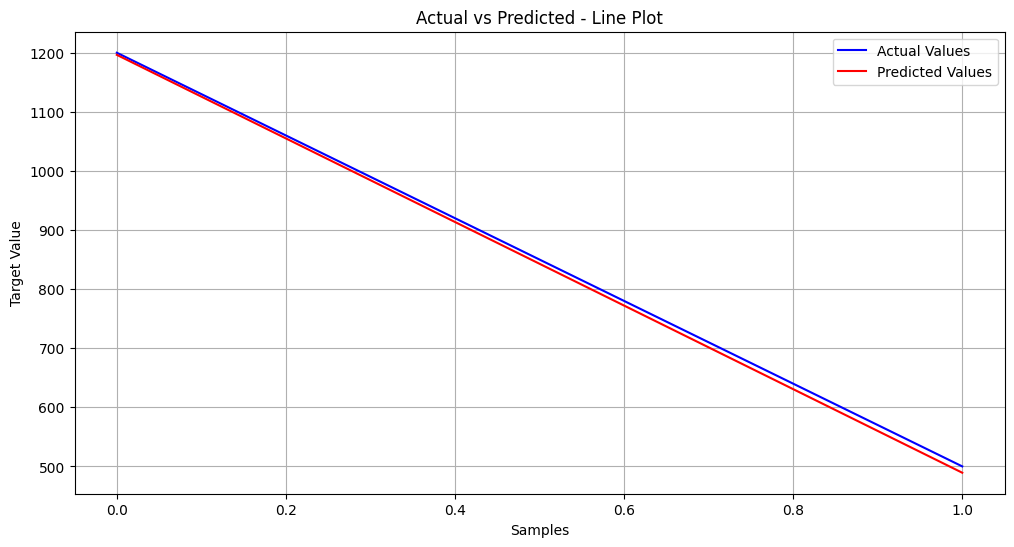

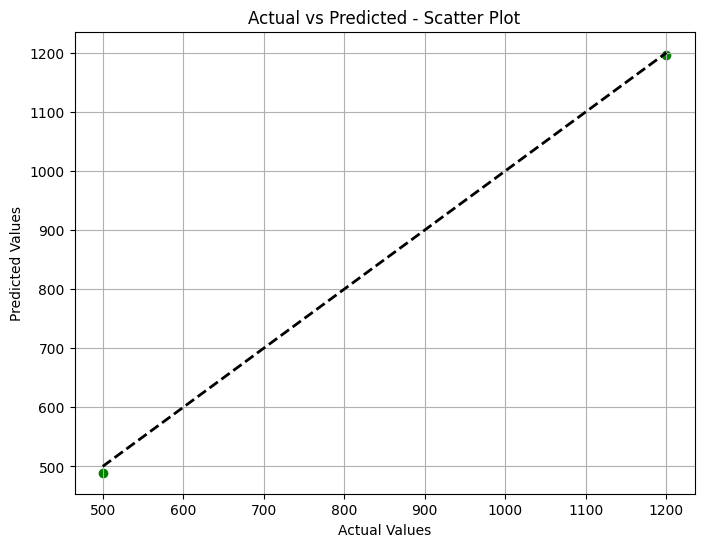

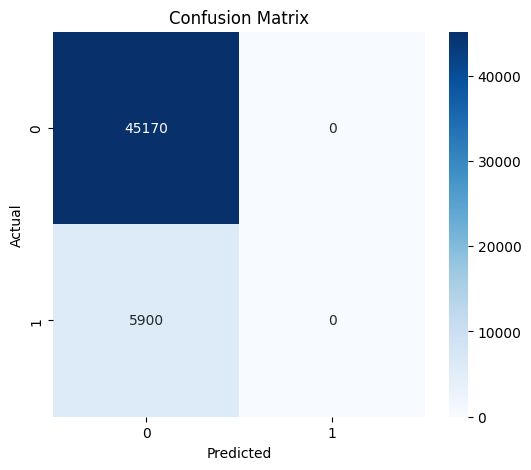

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 4: Visualization for Regression (Line Plot)
plt.figure(figsize=(12,6))

# Assuming 'y_test_rev' and 'predictions_regression' are from the Revenue/Expense Forecasting
plt.plot(y_test_rev.values, label='Actual Values', color='blue')
plt.plot(predictions_regression, label='Predicted Values', color='red')
plt.title('Actual vs Predicted - Line Plot')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

# Visualization for Regression (Scatter Plot)
plt.figure(figsize=(8,6))
plt.scatter(y_test_rev, predictions_regression, color='green')
plt.plot([y_test_rev.min(), y_test_rev.max()], [y_test_rev.min(), y_test_rev.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Scatter Plot')
plt.grid(True)
plt.show()

# Visualization for Classification (Confusion Matrix)
# Assuming 'cm', 'y_test', and 'y_pred' are from the Credit Risk Modeling
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Classification Report
print(classification_report(y_test, y_pred))


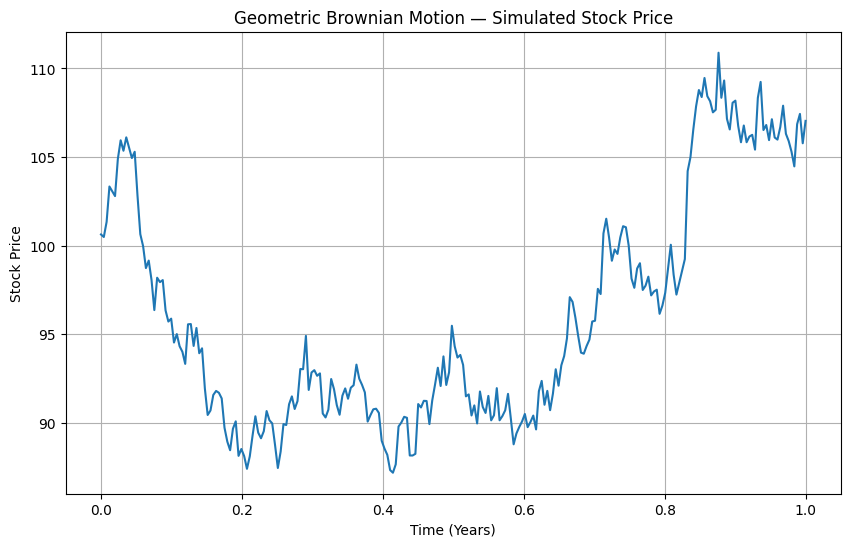

Call Option Price: 6.04
Put Option Price: 10.68


In [ ]:
# STEP 5: GBM + Black-Scholes (Advanced)
# Part A
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100        # Initial Stock Price
mu = 0.1        # Expected Return (10%)
sigma = 0.2     # Volatility (20%)
T = 1           # Time horizon (1 year)
dt = 1/252      # Daily steps (assuming 252 trading days)
N = int(T/dt)   # Total number of steps
np.random.seed(42)  # For repeatability

# Simulate
t = np.linspace(0, T, N)
W = np.random.standard_normal(size=N)
W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
X = (mu - 0.5 * sigma**2) * t + sigma * W
S = S0 * np.exp(X)

# Plot
plt.figure(figsize=(10,6))
plt.plot(t, S)
plt.title('Geometric Brownian Motion — Simulated Stock Price')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Part B (Black-Scholes Code)
from scipy.stats import norm
import numpy as np

# Parameters
S0 = 100    # Current Stock Price
K = 110     # Strike Price
r = 0.05    # Risk-free rate (5%)
T = 1       # Time to Maturity (1 year)
sigma = 0.2 # Volatility (20%)

# Black-Scholes Formula
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Call Option Price
call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Put Option Price
put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB
None
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1257.000000  1257.000000  1257.000000  1257.000000  1.257000e+03
mean     152.099693   153.628458   150.393242   151.942833  9.061449e+07
std       41.998935    42.137927    41.773141    41.938210  5.325627e+07
min       54.449894    55.452160    51.595990    55.350235  2.323470e+07
25%      126.916962   128.007149   124.891218   126.388676  5.54696

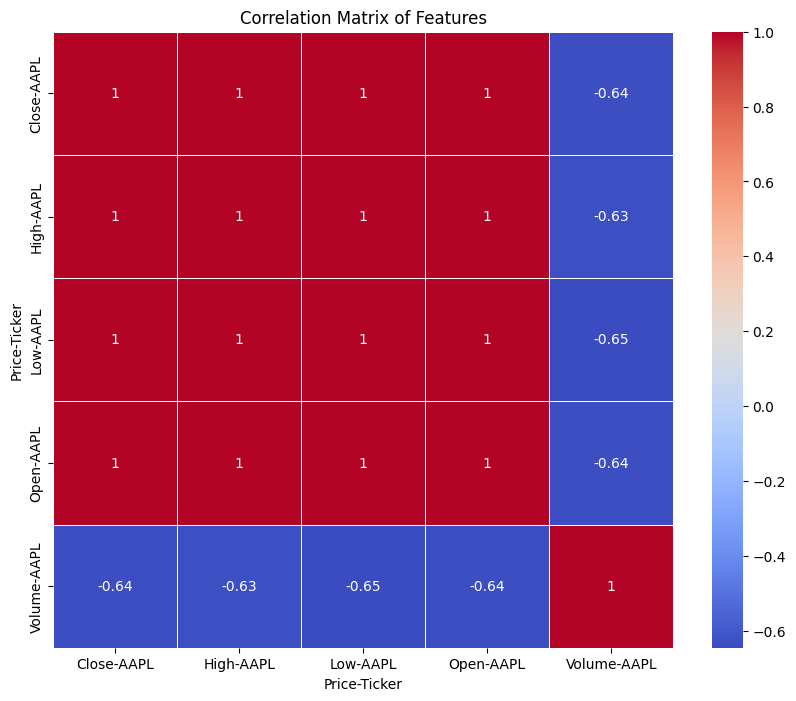

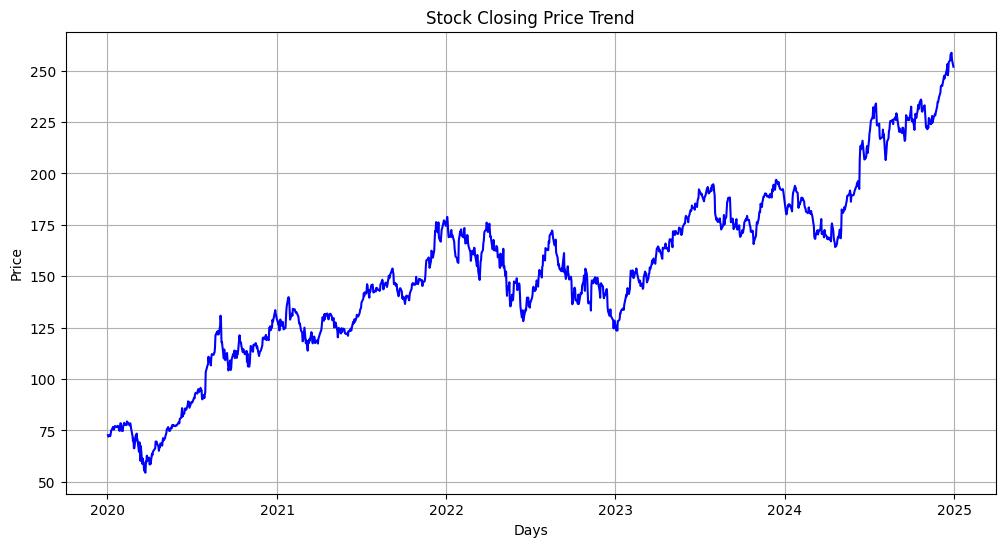

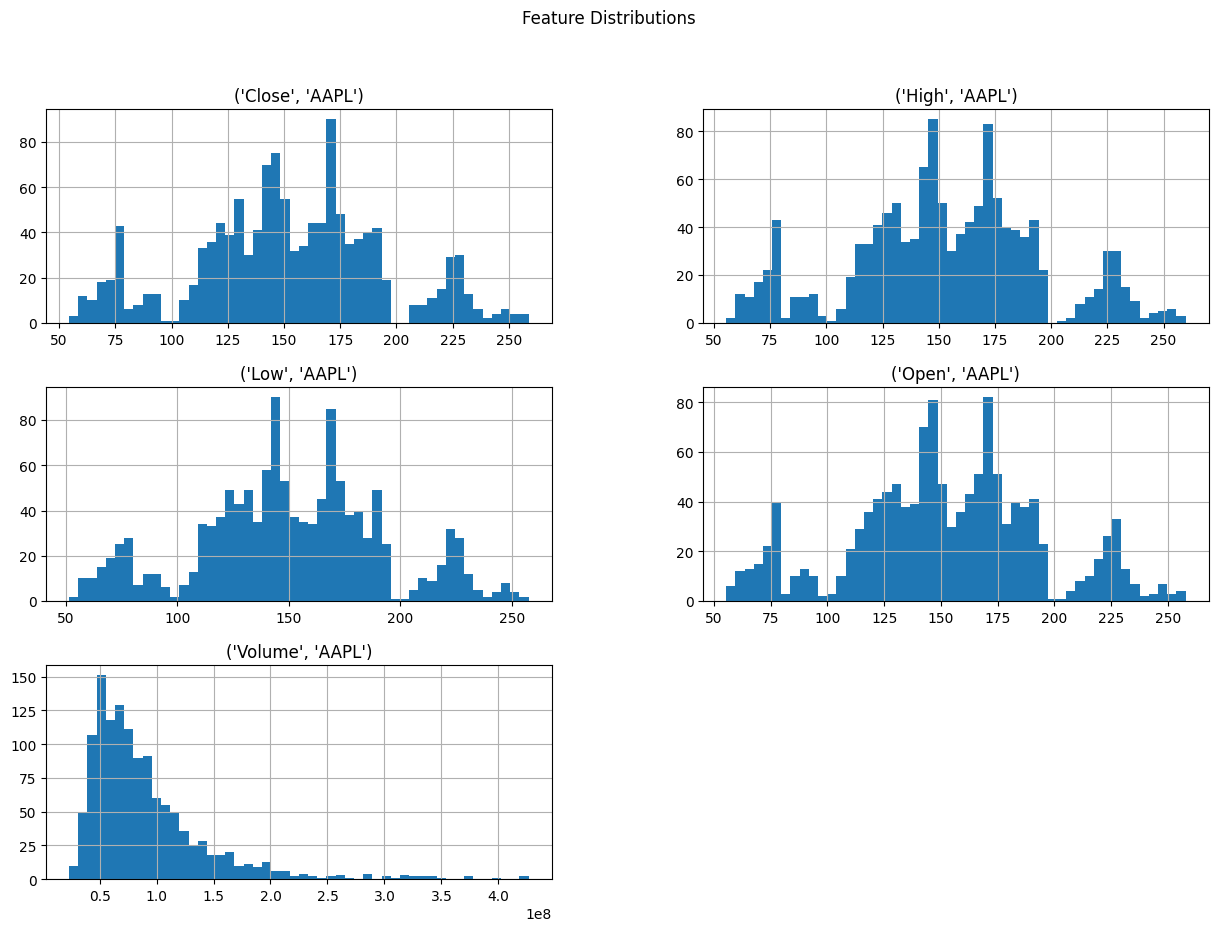

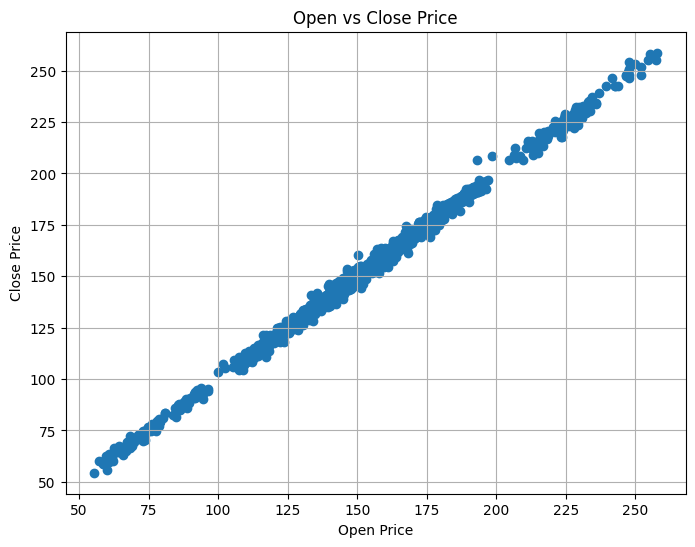

In [ ]:
# Step 6: EDA - Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Dataset is assumed loaded as 'data'

# 1. Dataset Info
print(data.info())
print(data.describe())
print(data.isnull().sum())

# 2. Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Trend of Close Price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], color='blue')
plt.title('Stock Closing Price Trend')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 4. Feature Distributions
data.hist(bins=50, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()

# 5. Scatter Plot between Open and Close
plt.figure(figsize=(8,6))
plt.scatter(data['Open'], data['Close'])
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
